# Using CNN for MNIST Handwritten Digit Classification

*   An image classification problem
*   Develop a convolutional neural network (CNN) for handwritten digit classification.
*   CNN uses multilayer perceptrons to do computational works.
*   The network learns through filters that in traditional algorithms were hand-engineered. So, for the image processing tasks CNNs are the best-suited option.




## The supervised machine learning (ML) process

![SML](https://static.javatpoint.com/tutorial/machine-learning/images/supervised-machine-learning.png)

### The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.
![DML](https://i.imgur.com/ITrm9x4.png)




** Import necessary Python libraries **

TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

https://www.tensorflow.org/

In [38]:
pip install keras==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


In [39]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

print("Libraries are imported successfully")
print("Tensorflow version: ",tf.__version__)


Libraries are imported successfully
Tensorflow version:  2.15.0


## Labeled data and labels - the MNIST dataset
* The MNIST dataset stands for the Modified National Institute of Standards and Technology dataset.

* It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

* The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

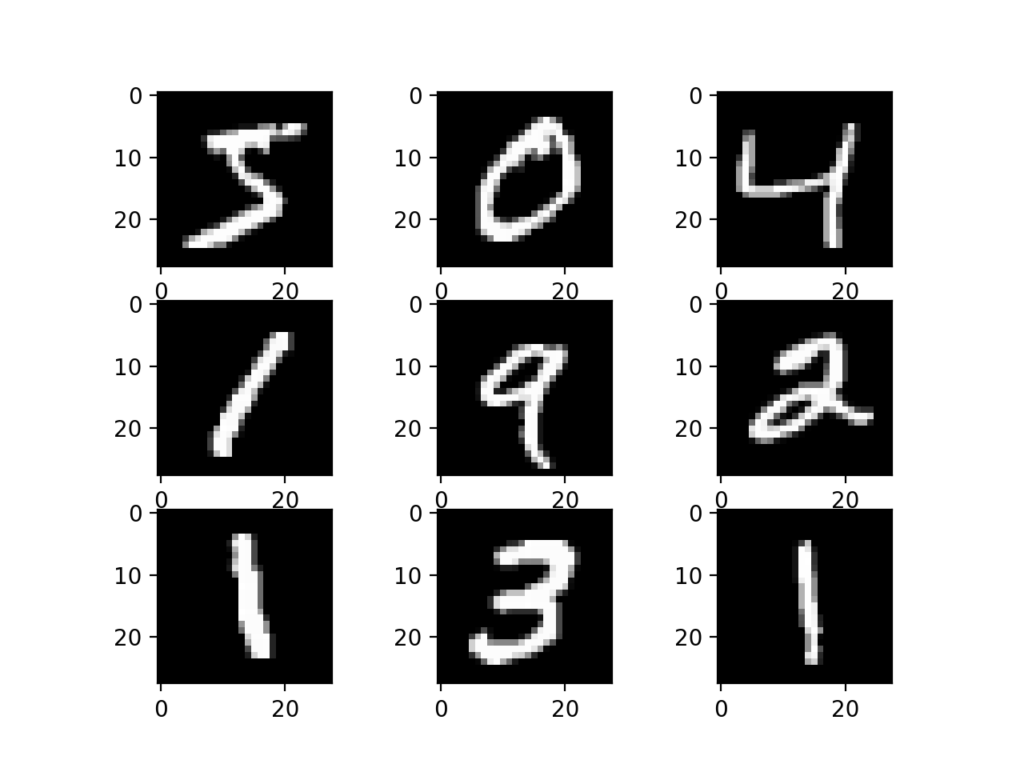

In [40]:
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()


# Translation of data
# Reshape to 60000 x (28 x 28 x1)
X_Train_keras = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')
X_Test_keras = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')


### Image representation
Image representation - B/W image
![](https://edtech.engineering.utoronto.ca/sites/default/files/M6_2DImageDigitalRepresentation.png)

**Image representation - Color image**
![](https://www.researchgate.net/profile/Bhupendra-Pratap-Singh/publication/282798184/figure/fig15/AS:283989639221249@1444719814399/Color-image-representation-and-RGB-matrix.png)

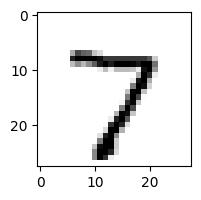

In [41]:
import matplotlib.pyplot as plt
def plot_image(image):
    #get current figure
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

plot_image(X_Test[0])

### Labels - *One-hot encoding*

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

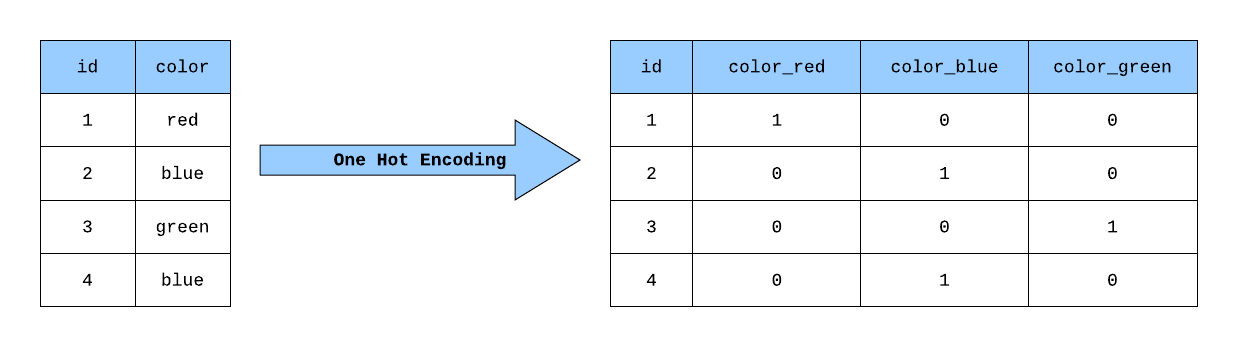




In [42]:
# Standardize feature data
X_Train_keras_norm = X_Train_keras / 255
X_Test_keras_norm = X_Test_keras /255

# Label Onehot-encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)



In [43]:
print("y_Train:",y_Train.shape)
print(type(y_Train))
print("y_TrainOneHot:",y_TrainOneHot.shape)
print(type(y_TrainOneHot))


y_Train: (60000,)
<class 'numpy.ndarray'>
y_TrainOneHot: (60000, 10)
<class 'numpy.ndarray'>


### Exercise 1
Question:

1.   What is the labeled data for 89th data set in MINST?
2.   Show the image of 89th data set (Hinst: by using plot_image)


In [63]:
# -------------Start editting -------------
# Read the labeled data for 89th data set in MINST
y_89th = y_Train[88]
print("Labeled data for 89th data set:", y_89th)
# -------------End editting -------------

Labeled data for 89th data set: 0


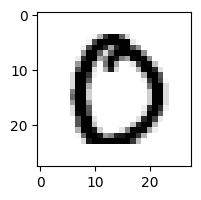

In [80]:
# -------------Start editting -------------
# Show the image of 89th data set (Hinst: by using plot_image)
plot_image(X_Train[88])
# -------------End editting -------------

## Model Training - Create a convolutional neural network
![](https://editor.analyticsvidhya.com/uploads/29624cnn_banner.png)


In [46]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()
# Create CN layer 1
model.add(Conv2D(filters=16,
                     kernel_size=(5,5),
                     padding='same',
                     input_shape=(28,28,1),
                     activation='relu'))
# Create Max-Pool 1
model.add(MaxPooling2D(pool_size=(2,2)))


# Add Dropout layer
model.add(Dropout(0.25))


Create two fully connected layer


In [47]:
model.add(Flatten())

model.add(Dense(128, activation='relu'))
#Prevent overfitting
model.add(Dropout(0.5))

#Ouput N-class probabilities
model.add(Dense(10, activation='softmax'))


model.summary()
print("")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               401536    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

* **layer1** is the Conv2d layer which convolves the image using 16 filters each of size (5*5).
* **layer2** is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2).
* **layer3** is showing Dropout at a rate of 0.25.
* **layer4** is flattening the output obtained from layer5 and this flattens output is passed to layer7.
* **layer5** is a hidden layer of a neural network containing 128 neurons.
* **layer6** is showing Dropout at a rate of 0.5.
* **layer7** is the output layer having 10 neurons for 10 classes of output that is using the softmax function.

### Convolutional operation

![](https://raw.githubusercontent.com/yashk2810/yashk2810.github.io/master/images/convolution.gif)

In [48]:
#kernel = np.array([
#    [1, 0, 1],
#    [0,  1, 0],
#    [1, 0, 1],
#])

kernel = np.array([
    [-1, 0, 1],
    [-2,  0, 2],
    [-1, 0, 1],
])

#kernel = np.array([np.array([2, -2]), np.array([2, -2])])

#plt.figure(figsize=(3, 3))
print(kernel)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


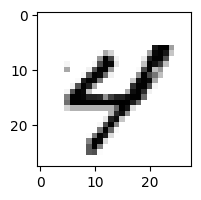

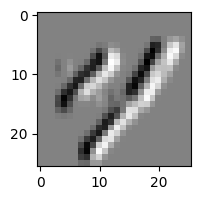

(28, 28)
(26, 26)


In [49]:
idx=89 # 51 52 89 50
image = X_Train[idx].astype('float32')
image_filter=np.zeros((image.shape[0]-kernel.shape[0]+1,image.shape[0]-kernel.shape[0]+1))
for r  in range(image.shape[0]-kernel.shape[0]+1):
  for c in range(image.shape[1]-kernel.shape[0]+1):
#for r  in range(6,7):
#  for c in range(21,22):
    value=0.0
    for x in range(kernel.shape[0]):
      for y in range(kernel.shape[0]):
        value=image[r+y,c+x]*kernel[y,x]+value
#        print(r,c,image[r,c],value)
    image_filter[r,c]=value

plot_image(image)
plot_image(image_filter)
print(image.shape)
print(image_filter.shape)
#print(type(kernel[0,0]))
#print(image[6,:])

## Model Training - Start to train the CNN

**Batch size** is a term used in machine learning and refers to the number of training examples utilized in one iteration.

**Loss function** is a function that maps an event or values of one or more variables onto a real number intutively representing some "cost" assocaited with the event.

[Tutorial](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=X_Train_keras_norm,
                          y=y_TrainOneHot, validation_split=0.2,
                          epochs=10, batch_size=300, verbose=2)

Epoch 1/10
160/160 - 6s - loss: 0.5357 - accuracy: 0.8365 - val_loss: 0.1610 - val_accuracy: 0.9542 - 6s/epoch - 35ms/step
Epoch 2/10
160/160 - 1s - loss: 0.2027 - accuracy: 0.9413 - val_loss: 0.0997 - val_accuracy: 0.9719 - 923ms/epoch - 6ms/step
Epoch 3/10
160/160 - 1s - loss: 0.1426 - accuracy: 0.9578 - val_loss: 0.0785 - val_accuracy: 0.9776 - 873ms/epoch - 5ms/step
Epoch 4/10
160/160 - 1s - loss: 0.1143 - accuracy: 0.9663 - val_loss: 0.0661 - val_accuracy: 0.9810 - 868ms/epoch - 5ms/step
Epoch 5/10
160/160 - 1s - loss: 0.0979 - accuracy: 0.9710 - val_loss: 0.0574 - val_accuracy: 0.9833 - 633ms/epoch - 4ms/step
Epoch 6/10
160/160 - 1s - loss: 0.0869 - accuracy: 0.9734 - val_loss: 0.0525 - val_accuracy: 0.9843 - 697ms/epoch - 4ms/step
Epoch 7/10
160/160 - 1s - loss: 0.0781 - accuracy: 0.9754 - val_loss: 0.0495 - val_accuracy: 0.9852 - 685ms/epoch - 4ms/step
Epoch 8/10
160/160 - 1s - loss: 0.0720 - accuracy: 0.9777 - val_loss: 0.0492 - val_accuracy: 0.9855 - 596ms/epoch - 4ms/step
Ep

## Prediction - Evaulate trained network

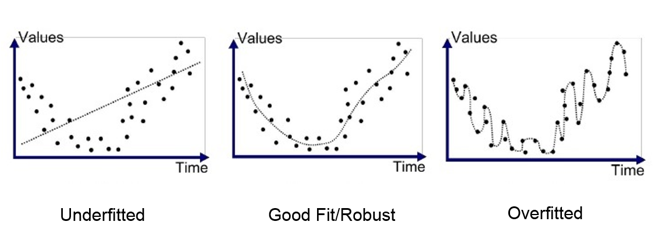

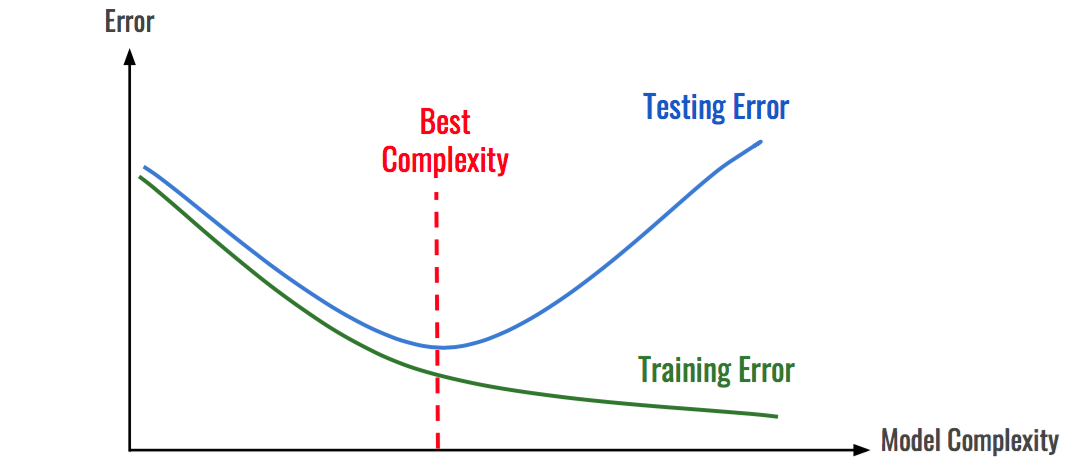

In [51]:
import os


import matplotlib.pyplot as plt


def plot_images_labels_predict(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "l=" + str(labels[idx])
        if len(prediction) > 0:
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))
        else:
            title = "l={}".format(str(labels[idx]))
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


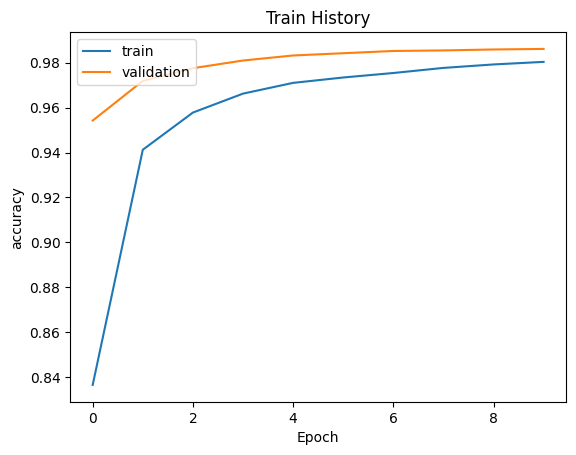

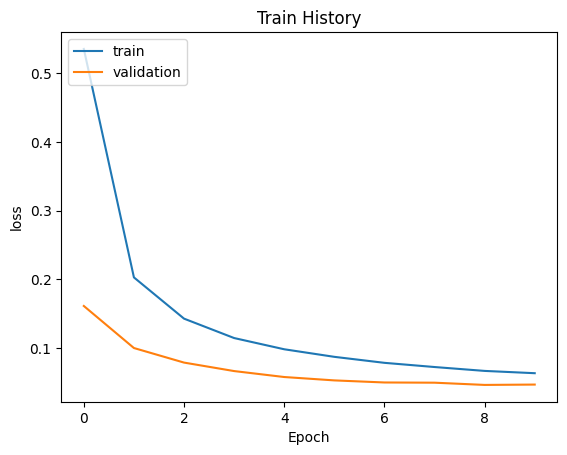

In [52]:
#!pip3 install utils
#from utils import *

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [53]:
loss, accuracy = model.evaluate(X_Test_keras_norm, y_TestOneHot)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(accuracy*100.0))


313/313 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9875

[Info] Accuracy of testing data = 98.8%


### Confusion Matrix
![Confusion Matrix](
https://www.researchgate.net/profile/Alejandro-Baldominos/publication/328816477/figure/fig3/AS:703352962809858@1544703822325/Confusion-matrix-for-the-MNIST-dataset-with-the-best-ensemble.png)


In [54]:
test_predictions = np.argmax(model.predict(X_Test_keras_norm), axis=-1)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_Test, y_pred = test_predictions)
print(cm)

313/313 [==============================] - 1s 2ms/step
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1131    1    2    0    0    0    0    1    0]
 [   2    3 1017    1    2    0    0    4    3    0]
 [   0    0    4 1001    0    3    0    0    2    0]
 [   1    1    0    0  972    0    2    0    1    5]
 [   2    0    0    7    0  879    2    0    2    0]
 [   6    3    0    0    1    1  946    0    1    0]
 [   2    1    9    3    0    0    0 1005    1    7]
 [   3    1    3    1    1    1    1    3  955    5]
 [   3    3    0    3    3    2    0    2    1  992]]


In [55]:
result = np.where(test_predictions != y_Test)
print(len(result[0]),",",result)

125 , (array([ 247,  259,  321,  340,  445,  447,  582,  613,  659,  684,  720,
        844,  846,  947, 1014, 1033, 1039, 1181, 1226, 1232, 1247, 1326,
       1364, 1393, 1522, 1530, 1549, 1553, 1611, 1709, 1717, 1754, 1790,
       1878, 1901, 2024, 2035, 2043, 2053, 2070, 2098, 2118, 2130, 2135,
       2182, 2387, 2406, 2454, 2462, 2488, 2560, 2597, 2654, 2896, 2921,
       2939, 2970, 3030, 3073, 3333, 3422, 3451, 3503, 3520, 3558, 3559,
       3604, 3751, 3808, 3906, 4075, 4163, 4176, 4199, 4205, 4207, 4224,
       4238, 4256, 4360, 4497, 4639, 4740, 4761, 4807, 4814, 4823, 4860,
       4956, 4966, 5140, 5887, 5888, 5937, 5955, 5973, 6071, 6091, 6166,
       6505, 6555, 6576, 6597, 6651, 6755, 7121, 7800, 7842, 7886, 8091,
       8094, 8095, 8325, 9009, 9015, 9019, 9024, 9540, 9664, 9729, 9770,
       9792, 9811, 9839, 9982]),)


[Info] Making prediction of X_Test_norm
313/313 [==============================] - 1s 2ms/step
[Info] Show 10 prediction result (From 18):


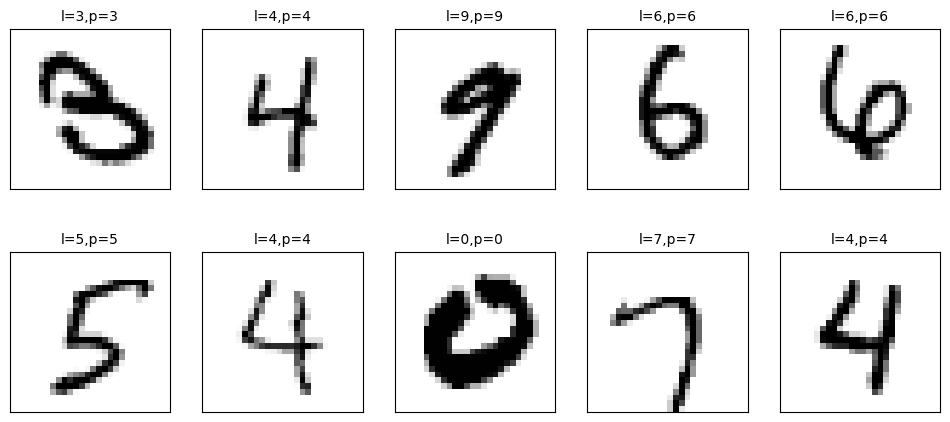

In [56]:
print("[Info] Making prediction of X_Test_norm")
#prediction = model.predict(X_Test_keras_norm)  # Making prediction and save result to prediction
prediction = np.argmax(model.predict(X_Test_keras_norm), axis=-1)  # Making prediction and save result to prediction
idx=18
print("[Info] Show 10 prediction result (From {}):".format(idx))
plot_images_labels_predict(X_Test, y_Test, prediction, idx)

### Exercise 2 - Complete the network for image classification

Reference: [Keras Layers API](https://keras.io/api/layers/)


In [101]:
model = Sequential()
# -------------Start editting -------------
# Complete the network for image classification
model.add(Conv2D(filters=64,
                     kernel_size=(5,5),
                     padding='same',
                     input_shape=(28,28,1),
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# -------------End editting -------------
model.summary()
print("")

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=X_Train_keras_norm,
                          y=y_TrainOneHot, validation_split=0.2,
                          epochs=10, batch_size=300, verbose=2)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 flatten_13 (Flatten)        (None, 12544)             0         
                                                                 
 dense_26 (Dense)            (None, 256)               3211520   
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                     

In [102]:
loss, accuracy = model.evaluate(X_Test_keras_norm, y_TestOneHot)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(accuracy*100.0))


313/313 [==============================] - 2s 7ms/step - loss: 0.0280 - accuracy: 0.9910

[Info] Accuracy of testing data = 99.1%


In [66]:
result = np.where(test_predictions != y_Test)
print(len(result[0]),",",result)

125 , (array([ 247,  259,  321,  340,  445,  447,  582,  613,  659,  684,  720,
        844,  846,  947, 1014, 1033, 1039, 1181, 1226, 1232, 1247, 1326,
       1364, 1393, 1522, 1530, 1549, 1553, 1611, 1709, 1717, 1754, 1790,
       1878, 1901, 2024, 2035, 2043, 2053, 2070, 2098, 2118, 2130, 2135,
       2182, 2387, 2406, 2454, 2462, 2488, 2560, 2597, 2654, 2896, 2921,
       2939, 2970, 3030, 3073, 3333, 3422, 3451, 3503, 3520, 3558, 3559,
       3604, 3751, 3808, 3906, 4075, 4163, 4176, 4199, 4205, 4207, 4224,
       4238, 4256, 4360, 4497, 4639, 4740, 4761, 4807, 4814, 4823, 4860,
       4956, 4966, 5140, 5887, 5888, 5937, 5955, 5973, 6071, 6091, 6166,
       6505, 6555, 6576, 6597, 6651, 6755, 7121, 7800, 7842, 7886, 8091,
       8094, 8095, 8325, 9009, 9015, 9019, 9024, 9540, 9664, 9729, 9770,
       9792, 9811, 9839, 9982]),)


## Exercise 3: Prediction -  Test your own handwritten digit
1.  Create your handwritten digit via the [Online image Editor](https://www.pixilart.com/draw/28x28-517d2f9c7af2f70)
2.  Download the file to your local drive
3. Upload the file to an [online storage](https://imgbb.com/)
4. Get the URL of your stored image

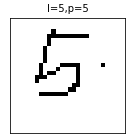


<ipython-input-103-b68882057605>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('https://i.ibb.co/gvYKDnB/pixil-frame-0-2.png')


1/1 [==============================] - 0s 108ms/step


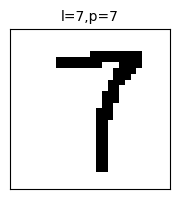

In [103]:
from imageio import imread
import numpy as np
# -------------Start editting -------------
image = imread('https://i.ibb.co/gvYKDnB/pixil-frame-0-2.png')
X_image=np.array([image[:,:,3]])
X_image_keras = X_image.reshape(X_image.shape[0], 28, 28, 1).astype('float32')
Y_label=np.array([7])
# -------------End editting -------------
prediction = np.argmax(model.predict(X_image_keras), axis=-1)  # Making prediction and save result to prediction
plot_images_labels_predict(X_image, Y_label, prediction, 0,1)